In [27]:
import pandas as pd
import numpy as np

In [28]:
# Import Click data
clicksData = pd.read_csv('C:/Users/joeka/OneDrive/Desktop/1_DSU/INFS768/Project/yoochoose-clicks.dat/yoochoose-clicks.dat', low_memory=False)

# Name column headers
clicksData.columns =['Session_ID', 'Timestamp', 'Item_ID', 'Category']

print(clicksData)

len(set(clicksData.Session_ID))

          Session_ID                 Timestamp    Item_ID Category
0                  1  2014-04-07T10:54:09.868Z  214536500        0
1                  1  2014-04-07T10:54:46.998Z  214536506        0
2                  1  2014-04-07T10:57:00.306Z  214577561        0
3                  2  2014-04-07T13:56:37.614Z  214662742        0
4                  2  2014-04-07T13:57:19.373Z  214662742        0
...              ...                       ...        ...      ...
33003938    11299809  2014-09-25T09:33:22.412Z  214819412        S
33003939    11299809  2014-09-25T09:43:52.821Z  214830939        S
33003940    11299811  2014-09-24T19:02:09.741Z  214854855        S
33003941    11299811  2014-09-24T19:02:11.894Z  214854838        S
33003942    11299811  2014-09-24T19:02:25.146Z  214848658        S

[33003943 rows x 4 columns]


9249729

In [29]:
# Import Buys data
buysData = pd.read_csv('C:/Users/joeka/OneDrive/Desktop/1_DSU/INFS768/Project/yoochoose-buys.dat/yoochoose-buys.dat', low_memory=False)

# Name column headers
buysData.columns =['Session_ID', 'Timestamp', 'Item_ID', 'Price', 'Quantity']

print(buysData)

len(set(buysData.Session_ID))

         Session_ID                 Timestamp    Item_ID  Price  Quantity
0            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
1            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
2            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
3            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
4            140806  2014-04-07T09:22:28.132Z  214668193    523         1
...             ...                       ...        ...    ...       ...
1150747    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150748    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150749    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150750    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150751    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[1150752 rows x 5 columns]


509696

In [30]:
# Add "Buys" column to Buys data and fill values as 1
buysData['Buys'] = pd.Series([1 for x in range(len(buysData.index))])

print(buysData)

         Session_ID                 Timestamp    Item_ID  Price  Quantity  \
0            420374  2014-04-06T18:44:58.325Z  214537850  10471         1   
1            281626  2014-04-06T09:40:13.032Z  214535653   1883         1   
2            420368  2014-04-04T06:13:28.848Z  214530572   6073         1   
3            420368  2014-04-04T06:13:28.858Z  214835025   2617         1   
4            140806  2014-04-07T09:22:28.132Z  214668193    523         1   
...             ...                       ...        ...    ...       ...   
1150747    11368701  2014-09-26T07:52:51.357Z  214849809    554         2   
1150748    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5   
1150749    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1   
1150750    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1   
1150751    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1   

         Buys  
0           1  
1           1  
2           1  
3          

In [31]:
yoochooseFull = clicksData[['Session_ID','Timestamp', 'Item_ID', 'Category']].merge(buysData[['Session_ID','Price', 'Quantity', 'Buys']], on = 'Session_ID', how = 'outer')

yoochooseFull

,Session_ID,Timestamp,Item_ID,Category,Price,Quantity,Buys
0,1,2014-04-07T10:54:09.868Z,214536500,0,NaN,NaN,NaN
1,1,2014-04-07T10:54:46.998Z,214536506,0,NaN,NaN,NaN
2,1,2014-04-07T10:57:00.306Z,214577561,0,NaN,NaN,NaN
3,2,2014-04-07T13:56:37.614Z,214662742,0,NaN,NaN,NaN
4,2,2014-04-07T13:57:19.373Z,214662742,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
40596041,11299809,2014-09-25T09:33:22.412Z,214819412,S,NaN,NaN,NaN
40596042,11299809,2014-09-25T09:43:52.821Z,214830939,S,NaN,NaN,NaN
40596043,11299811,2014-09-24T19:02:09.741Z,214854855,S,NaN,NaN,NaN
40596044,11299811,2014-09-24T19:02:11.894Z,214854838,S,NaN,NaN,NaN


In [32]:
yoochooseFull['Buys'] = yoochooseFull['Buys'].fillna(0)
yoochooseFull

,Session_ID,Timestamp,Item_ID,Category,Price,Quantity,Buys
0,1,2014-04-07T10:54:09.868Z,214536500,0,NaN,NaN,0.0
1,1,2014-04-07T10:54:46.998Z,214536506,0,NaN,NaN,0.0
2,1,2014-04-07T10:57:00.306Z,214577561,0,NaN,NaN,0.0
3,2,2014-04-07T13:56:37.614Z,214662742,0,NaN,NaN,0.0
4,2,2014-04-07T13:57:19.373Z,214662742,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...
40596041,11299809,2014-09-25T09:33:22.412Z,214819412,S,NaN,NaN,0.0
40596042,11299809,2014-09-25T09:43:52.821Z,214830939,S,NaN,NaN,0.0
40596043,11299811,2014-09-24T19:02:09.741Z,214854855,S,NaN,NaN,0.0
40596044,11299811,2014-09-24T19:02:11.894Z,214854838,S,NaN,NaN,0.0


In [33]:
## Undersample larger volume of Sessions that don't have a Buy with smaller volume of Sessions that do have a Buy to remove bias.

# Get the total count of low-frequency group(Buys = 1)
sample_size = len(yoochooseFull[yoochooseFull.Buys == 1]) # get the total count of low-frequency group(Buys: 1)
Buys_indices = yoochooseFull[yoochooseFull.Buys == 1].index
Buys_sample = yoochooseFull.loc[Buys_indices]
print (Buys_sample)

          Session_ID                 Timestamp    Item_ID Category   Price  \
23                11  2014-04-03T10:44:35.672Z  214821275        0  1046.0   
24                11  2014-04-03T10:44:35.672Z  214821275        0  1046.0   
25                11  2014-04-03T10:45:01.674Z  214821275        0  1046.0   
26                11  2014-04-03T10:45:01.674Z  214821275        0  1046.0   
27                11  2014-04-03T10:45:29.873Z  214821371        0  1046.0   
...              ...                       ...        ...      ...     ...   
40595895    11299793  2014-09-25T07:07:57.252Z  214851757        S  2093.0   
40595896    11299793  2014-09-25T07:08:34.444Z  214854804        S  1570.0   
40595897    11299793  2014-09-25T07:08:34.444Z  214854804        S  2093.0   
40595898    11299793  2014-09-25T07:13:54.356Z  214834933        5  1570.0   
40595899    11299793  2014-09-25T07:13:54.356Z  214834933        5  2093.0   

          Quantity  Buys  
23             1.0   1.0  
24       

In [34]:
len(yoochooseFull[yoochooseFull.Buys == 1])

10897790

In [35]:
yoochooseFull['Buys'].value_counts()

0.0    29698256
1.0    10897790
Name: Buys, dtype: int64

In [36]:
# Count the number of non-buys/high-frequency group
NotBuys_indices = yoochooseFull[yoochooseFull.Buys == 0].index

# Use the low-frequency group count to randomly sample from high-frequency group
random_indices = np.random.choice(NotBuys_indices, sample_size, replace=False) 
NotBuys_sample = yoochooseFull.loc[random_indices]
print (NotBuys_sample)

          Session_ID                 Timestamp    Item_ID Category  Price  \
1503234       421281  2014-04-02T14:24:32.345Z  214691390        0    NaN   
22392949     6281387  2014-07-20T19:30:14.409Z  214835426        3    NaN   
33835162     9656578  2014-09-01T15:34:42.374Z  214545984        2    NaN   
6394129      1587622  2014-04-28T18:24:10.678Z  214555181        0    NaN   
26454770     7822274  2014-08-10T09:23:58.558Z  214840487        2    NaN   
...              ...                       ...        ...      ...    ...   
2836788       728061  2014-04-08T05:44:40.296Z  214746450        0    NaN   
17172858     4850752  2014-06-10T08:14:33.210Z  214839913        0    NaN   
9698051      2434638  2014-05-10T15:25:23.670Z  214829880        0    NaN   
2887871       740759  2014-04-09T05:43:47.808Z  214638590        0    NaN   
22679856     6465042  2014-07-21T14:57:22.093Z  214585082        2    NaN   

          Quantity  Buys  
1503234        NaN   0.0  
22392949       NaN   

In [37]:
# Merging all the low-frequency group sample and the new (randomly selected) high-frequency sample together
merged_sample = pd.concat([Buys_sample, NotBuys_sample], ignore_index=True)
print (merged_sample)

          Session_ID                 Timestamp    Item_ID Category   Price  \
0                 11  2014-04-03T10:44:35.672Z  214821275        0  1046.0   
1                 11  2014-04-03T10:44:35.672Z  214821275        0  1046.0   
2                 11  2014-04-03T10:45:01.674Z  214821275        0  1046.0   
3                 11  2014-04-03T10:45:01.674Z  214821275        0  1046.0   
4                 11  2014-04-03T10:45:29.873Z  214821371        0  1046.0   
...              ...                       ...        ...      ...     ...   
21795575      728061  2014-04-08T05:44:40.296Z  214746450        0     NaN   
21795576     4850752  2014-06-10T08:14:33.210Z  214839913        0     NaN   
21795577     2434638  2014-05-10T15:25:23.670Z  214829880        0     NaN   
21795578      740759  2014-04-09T05:43:47.808Z  214638590        0     NaN   
21795579     6465042  2014-07-21T14:57:22.093Z  214585082        2     NaN   

          Quantity  Buys  
0              1.0   1.0  
1        

In [38]:
# Change "Timestamp" format to datetime
merged_sample["Timestamp"] = pd.to_datetime(merged_sample["Timestamp"])

# Extract date/time dimensions from "Timestamp" into separate columns and add it to dataframe
merged_sample["Year"] = merged_sample["Timestamp"].dt.year
merged_sample["Month"] = merged_sample["Timestamp"].dt.month
merged_sample["Day"] = merged_sample["Timestamp"].dt.day
merged_sample["Hour"] = merged_sample["Timestamp"].dt.strftime("%H")

merged_sample

,Session_ID,Timestamp,Item_ID,Category,Price,Quantity,Buys,Year,Month,Day,Hour
0,11,2014-04-03 10:44:35.672000+00:00,214821275,0,1046.0,1.0,1.0,2014,4,3,10
1,11,2014-04-03 10:44:35.672000+00:00,214821275,0,1046.0,1.0,1.0,2014,4,3,10
2,11,2014-04-03 10:45:01.674000+00:00,214821275,0,1046.0,1.0,1.0,2014,4,3,10
3,11,2014-04-03 10:45:01.674000+00:00,214821275,0,1046.0,1.0,1.0,2014,4,3,10
4,11,2014-04-03 10:45:29.873000+00:00,214821371,0,1046.0,1.0,1.0,2014,4,3,10
...,...,...,...,...,...,...,...,...,...,...,...
21795575,728061,2014-04-08 05:44:40.296000+00:00,214746450,0,NaN,NaN,0.0,2014,4,8,05
21795576,4850752,2014-06-10 08:14:33.210000+00:00,214839913,0,NaN,NaN,0.0,2014,6,10,08
21795577,2434638,2014-05-10 15:25:23.670000+00:00,214829880,0,NaN,NaN,0.0,2014,5,10,15
21795578,740759,2014-04-09 05:43:47.808000+00:00,214638590,0,NaN,NaN,0.0,2014,4,9,05


In [39]:
merged_sample = merged_sample.sample(frac = 0.1)

In [40]:
# One-Hot Encode 279 "Category" variables into separate feature columns
one_hot_encoded_data = pd.get_dummies(merged_sample, columns = ['Category'])
print(one_hot_encoded_data)

          Session_ID                        Timestamp    Item_ID   Price  \
18686018     5579758 2014-07-02 05:47:35.377000+00:00  214651582     NaN   
7099934      7963746 2014-08-07 11:11:48.754000+00:00  214846127     0.0   
3268301      3862261 2014-06-01 09:01:54.734000+00:00  214835167     0.0   
10562412    10866783 2014-09-21 08:55:33.270000+00:00  214854502   523.0   
10051536    10530743 2014-09-14 19:04:34.086000+00:00  214567329   941.0   
...              ...                              ...        ...     ...   
21403807     3783107 2014-06-02 19:29:55.285000+00:00  214676319     NaN   
1969375      1940993 2014-05-04 11:32:29.968000+00:00  214821371     0.0   
1164193      1188392 2014-04-15 13:19:59.509000+00:00  214837487   627.0   
891858        869029 2014-04-12 18:49:49.002000+00:00  214577293  1674.0   
6584437      7383901 2014-08-04 19:36:13.164000+00:00  214838098     0.0   

          Quantity  Buys  Year  Month  Day Hour  ...  Category_4  Category_5  \
1868601

In [41]:
# drop "Timestamp" column
one_hot_encoded_data = one_hot_encoded_data.drop('Timestamp', 1)

In [42]:
# fill NaN with 0
one_hot_encoded_data = one_hot_encoded_data.fillna(0)

In [43]:
# indepedent variable feature set equals all features except for "Buys", so drop "Buys"
x = one_hot_encoded_data.drop('Buys', axis=1)

In [44]:
# dependent variable feature set is only "Buys"
y = one_hot_encoded_data['Buys']
print(y)

18686018    0.0
7099934     1.0
3268301     1.0
10562412    1.0
10051536    1.0
           ... 
21403807    0.0
1969375     1.0
1164193     1.0
891858      1.0
6584437     1.0
Name: Buys, Length: 2179558, dtype: float64


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [98]:
# Split the data in training and testing subsets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, stratify=y, random_state=0, test_size=0.20)

In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_ts = sc.transform(x_ts)

In [100]:
# using 1 hidden layer, with 10 units
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=100)
mlp.fit(x_tr, y_tr)

MLPClassifier(hidden_layer_sizes=[10], max_iter=100, random_state=0)

In [101]:
print("Accuracy on training set: {:.2f}".format(mlp.score(x_tr, y_tr)))
print("Accuracy on all features test set: {:.2f}".format(mlp.score(x_ts, y_ts)))

Accuracy on training set: 0.77
Accuracy on all features test set: 0.78


In [102]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_ts, mlp.predict_proba(x_ts)[:, 1])
print("MLP AUC for Alpha = 1: {:.3f}".format(rf_auc))

MLP AUC for Alpha = 1: 0.893


In [104]:
y_pred = mlp.predict(x_ts)
from sklearn.metrics import classification_report
print ("Classification Report: alpha = 0.0001")
print(classification_report(y_ts, y_pred))

Classification Report: alpha = 0.0001
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77    217908
         1.0       0.76      0.80      0.78    218004

    accuracy                           0.78    435912
   macro avg       0.78      0.78      0.78    435912
weighted avg       0.78      0.78      0.78    435912



In [79]:
# Hyperparameter tuning alpha

parameter_space = {'alpha': [0.00001, 0.0001, 0.1]}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

In [80]:
clf.fit(x_tr, y_tr)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=[10], max_iter=100,
                                     random_state=0),
             n_jobs=-1, param_grid={'alpha': [1e-05, 0.0001, 0.1]})

In [81]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 1e-05}


In [82]:
# Retrain using best alpha parameter
mlp2 = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=100, alpha=0.00001)
mlp2.fit(x_tr, y_tr)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=[10], max_iter=100,
              random_state=0)

In [83]:
print("Accuracy on training set: {:.2f}".format(mlp2.score(x_tr, y_tr)))
print("Accuracy on all features test set: {:.2f}".format(mlp2.score(x_ts, y_ts)))

Accuracy on training set: 0.78
Accuracy on all features test set: 0.78


In [84]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_ts, mlp2.predict_proba(x_ts)[:, 1])
print("MLP AUC for Alpha = 1: {:.3f}".format(rf_auc))

MLP AUC for Alpha = 1: 0.894


In [96]:
y_pred = mlp2.predict(x_ts)
from sklearn.metrics import classification_report
print ("Classification Report: (alpha = 0.00001)")
print(classification_report(y_ts, y_pred))

Classification Report: (alpha = 0.00001)
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81    217908
         1.0       0.91      0.61      0.73    218004

    accuracy                           0.78    435912
   macro avg       0.81      0.78      0.77    435912
weighted avg       0.81      0.78      0.77    435912



In [90]:
# Testing if Feature Selected model performs better

# use f_classif (the default) and SelectPercentile to select 50% of features
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50)
select.fit(x_tr, y_tr)

C:\Users\joeka\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  4  52  60  98 168 190] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\joeka\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50)

In [91]:
# transform training set
x_train_selected = select.transform(x_tr)

# transform test data
x_test_selected = select.transform(x_ts)

In [93]:
# train with feature selected dataset
mlp.fit(x_train_selected, y_tr)

MLPClassifier(hidden_layer_sizes=[10], max_iter=100, random_state=0)

In [94]:
print("Score with only selected features: {:.3f}".format(mlp.score(x_test_selected, y_ts)))

Score with only selected features: 0.776


[ True  True  True  True False  True  True  True  True  True  True  True
  True  True False  True  True  True False False False False  True  True
 False False False False False False  True  True  True False False  True
  True  True False False  True  True  True False False False  True False
 False  True False False  True  True  True  True False  True False  True
 False False False  True False False False  True False False  True  True
  True  True False False False False  True False  True  True False  True
 False False  True  True  True  True False  True  True False False False
 False False  True  True  True False  True  True  True  True  True False
 False False False False False  True  True  True False False  True False
 False False  True False  True  True  True  True False False False False
 False False  True False  True False False False  True  True False  True
  True False False False  True  True  True  True False  True False  True
 False False  True False  True False  True  True Fa

([], [])

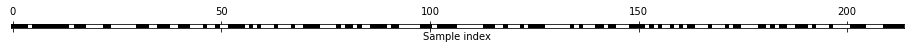

In [39]:
# Feature Selection/Selected Features
import matplotlib.pyplot as plt

# Selected Features
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())